In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import statistics

#_remove_summaries() 
WIDTH = 160
HEIGHT = 120
LR = 1e-3
EPOCHS = 600
MODEL_NAME = 'pygta5-car-fast-{}-{}-{}-epochs-300K-data.model'.format(LR, 'alexnetv2',EPOCHS)

model = build_alexnet_batchnorm_model()

model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=LR, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

test_acc   = []
test_loss  = []
train_acc  = []
train_loss = []

hm_data = 22
for epoch in range(1,EPOCHS+1):
    print('----- --------STARTING EPOCH {}-------------'.format(epoch))

    epoch_test_acc   = []
    epoch_test_loss  = []
    epoch_train_acc  = []
    epoch_train_loss = []

    for i in range(1,hm_data+1):
        train_data = np.load('/content/drive/MyDrive/GTA Driving Data/training_data-{}-balanced.npy'.format(i),allow_pickle=True)

        train = train_data  #[:-100]
        #test = train_data  #[-100:]

        X = np.array([i[0] for i in train],dtype=np.float32).reshape(-1,WIDTH,HEIGHT,1)
        Y = np.array([i[1] for i in train]).reshape(-1,3)
        #print(Y.shape)

        #test_x = np.array([i[0] for i in test]).reshape(-1,WIDTH,HEIGHT,1)
        #test_y = [i[1] for i in test]
        
        history = model.fit(X,Y,validation_split=0.1,verbose=0)

        epoch_train_acc.append(history.history['acc'][0])
        epoch_train_loss.append(history.history['loss'][0])
        epoch_test_loss.append(history.history['val_loss'][0])
        epoch_test_acc.append(history.history['val_acc'][0])
    
    train_acc.append(statistics.mean(epoch_train_acc))
    test_acc.append(statistics.mean(epoch_test_acc))
    train_loss.append(statistics.mean(epoch_train_loss))
    test_loss.append(statistics.mean(epoch_test_loss))
    print("avg train accuracy: {}".format(statistics.mean(epoch_train_acc)))
    print("avg test accuracy: {}".format(statistics.mean(epoch_test_acc)))
    if epoch % 100 == 0:
          print("SAVED")
          file_name = "/content/drive/MyDrive/GTA Driving Data/training weights/gta_sentdex_model_epoch_{}.h5".format(epoch)
          model.save(file_name)
          graph_data = [train_acc,test_acc,train_loss,test_loss]
          np.save('/content/drive/MyDrive/GTA Driving Data/progress data/accuracy_graph_data.npy',graph_data)
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
"""
print(train_acc)
print(test_acc)
print(train_loss)
print(test_loss)
"""
ax1.plot(train_acc, "-b",label = "train accuracy")
ax1.plot(test_acc, "-r",label = "test accuracy")
ax2 = f2.add_subplot(111)
ax2.plot(train_loss, "-b",label = "train loss")
ax2.plot(test_loss, "-r",label = "test loss")
plt.show()

----- --------STARTING EPOCH 1-------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


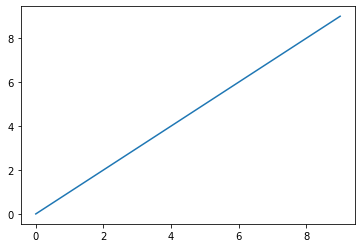

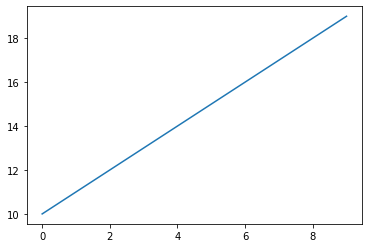

In [29]:

f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.plot(range(0,10))
ax2 = f2.add_subplot(111)
ax2.plot(range(10,20))
plt.show()

In [ ]:
!pip install tflearn
""" AlexNet.
Applying 'Alexnet' to Oxford's 17 Category Flower Dataset classification task.
References:
    - Alex Krizhevsky, Ilya Sutskever and Geoffrey E. Hinton. ImageNet
    Classification with Deep Convolutional Neural Networks. NIPS, 2012.

Links:
    - [AlexNet Paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
"""

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.layers.normalization import local_response_normalization

def alexnet(width, height, lr):
    network = input_data(shape=[None, width, height, 1], name='input')
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 3, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=lr, name='targets')

    model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                        max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir='log')

    return model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Input

def build_alexnet_batchnorm_model():
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu'),#, input_shape=(120, 160, 1)),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3,activation='softmax')
  ])
  return model
